##  Oasis Internship task 3 by Vatsal Zaveri

# Car Price Prediction

In [1]:
#importing necessary modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#reading the dataset
df = pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#defining the output
y = df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [4]:
#dropping the output from the training data
x =df.drop(columns = 'price')

##### The below plot shows a Scatter plot of the Horsepower of various cars

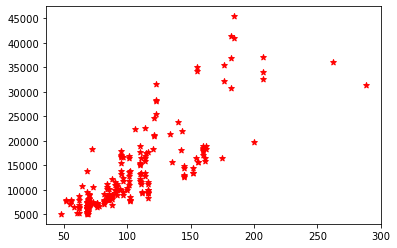

In [5]:
plt.scatter(df['horsepower'],y,color='r', marker = '*')

##### checking for null values in the dataset

In [6]:
x.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

##### plotting a displot to observe the distribution of  column cylindernumber

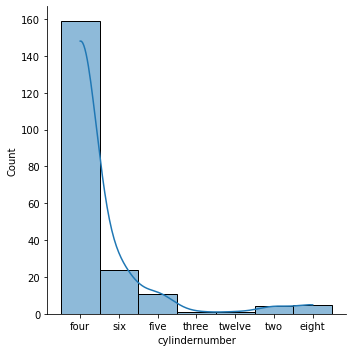

In [7]:
sns.displot(x = df['cylindernumber'], bins = 10, kde = True)

#### Checking for the value counts for each columns. This gives a more clear idea about the data. 

In [8]:
x['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [9]:
x['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [10]:
x['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

##### A pie chart illustrating the distribution of car bodies by count across various types.

<AxesSubplot:ylabel='carbody'>

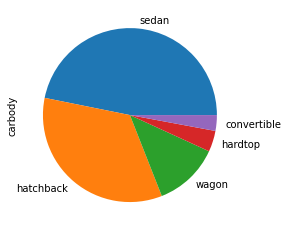

In [11]:
x['carbody'].value_counts().plot(kind = 'pie')

In [12]:
x['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

##### Mapping the values in the columns to numbers so as to achieve better accuracy in the results

In [13]:
x['cylindernumber'] = x['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
x['doornumber'] = x['doornumber'].replace({'two':2,'four':4})
x['fueltype'] = x['fueltype'].replace({'gas':1,'diesel':2})
x['aspiration'] = x['aspiration'].replace({'std':1,'turbo':2})
x['carbody'] = x['carbody'].replace({'sedan':1,'hatchback':2, 'wagon':3,'hardtop':4,'convertible':5})
x['drivewheel'] = x['drivewheel'].replace({'fwd':1,'rwd':2, '4wd':1})
x

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,1,1,2,5,2,front,88.6,...,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,1,1,2,5,2,front,88.6,...,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,1,1,2,2,2,front,94.5,...,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,1,1,4,1,1,front,99.8,...,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,1,1,4,1,1,front,99.4,...,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,1,4,1,2,front,109.1,...,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,-1,volvo 144ea,1,2,4,1,2,front,109.1,...,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,-1,volvo 244dl,1,1,4,1,2,front,109.1,...,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,-1,volvo 246,2,2,4,1,2,front,109.1,...,6,145,idi,3.01,3.40,23.0,106,4800,26,27


In [14]:
x['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [15]:
x['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [16]:
x['fuelsystem'] = x['fuelsystem'].replace({'mpfi':1,'2bbl':2,'idi':3, '1bbl':4, 'spdi':5, '4bbl':6, 'mfi':7, 'spfi':8})
x['enginelocation'] = x['enginelocation'].replace({'front':1,'rear':2})

In [17]:
x['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [18]:
x['enginetype'] = x['enginetype'].replace({'ohc':1,'ohcf':2,'ohcv':3, 'dohc':4, 'l':5, 'rotor':6, 'dohcv':7})

In [19]:
x['CarName']=x['CarName'].apply(lambda x: x.split()[0])
x['CarName']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [20]:
x['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

#### As we can observe, there are lots of spelling errors in the CarName column
#### Thus, correcting the same by mapping the incorrect names with the correct ones.

In [21]:
x['CarName'] = x['CarName'].replace({'maxda':'mazda', 'porcshce':'porsche', 'Nissan':'nissan', 'vokswagen': 'volkswagen', 'toyouta': 'toyota', 'vw':'volkswagen'})

In [22]:
x['CarName'] = x['CarName'].replace({'toyota':1,'nissan':2,'mazda':3, 'honda':4, 'mitsubishi':5, 'subaru':6, 'volvo':7, 'peugeot':8, 'volkswagen':9, 'dodge':10, 'bmw':11, 'buick':12, 'audi':13, 'plymouth':14, 'saab':15, 'porsche':16, 'isuzu':17, 'chevrolet':18, 'alfa-romero':19, 'jaguar':20, 'renault':21, 'mercury':22})

### Now, our data cleaning and preprocessing  is done.

#### A heatmap to understand the correlation between various features of the car.

<AxesSubplot:>

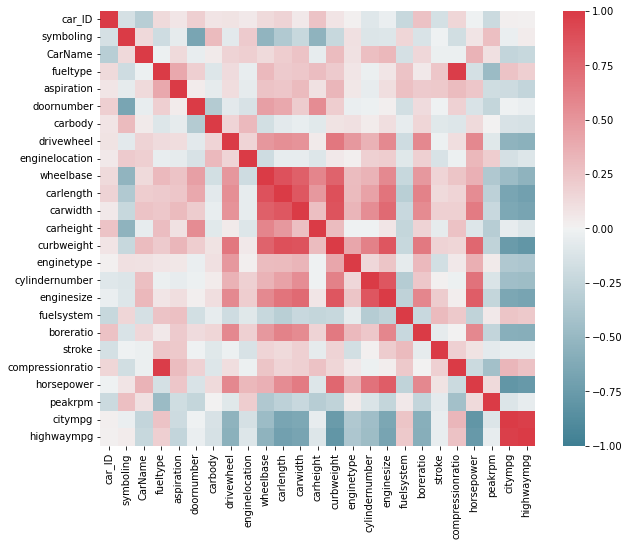

In [23]:
f, ax = plt.subplots(figsize=(10, 8))
corr = x.corr()
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),vmin=-1.0, vmax=1.0,square=True, ax=ax)

### Importing necessary modules for model training

In [24]:
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 

In [25]:
#scaling the data
Xs = scale(x) 

In [26]:
DATA=pd.DataFrame(Xs) 
DATA.head() 

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.723622,1.743470,2.110461,-0.328798,-0.469295,-1.130388,3.217410,1.302831,-0.121867,-1.690772,...,-0.352887,0.074449,-0.760049,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,-1.706724,1.743470,2.110461,-0.328798,-0.469295,-1.130388,3.217410,1.302831,-0.121867,-1.690772,...,-0.352887,0.074449,-0.760049,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,-1.689826,0.133509,2.110461,-0.328798,-0.469295,-1.130388,0.182583,1.302831,-0.121867,-0.708596,...,1.502032,0.604046,-0.760049,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,-1.672928,0.938490,1.018843,-0.328798,-0.469295,0.884652,-0.829026,-0.767559,-0.121867,0.173698,...,-0.352887,-0.431076,-0.760049,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,-1.656029,0.938490,1.018843,-0.328798,-0.469295,0.884652,-0.829026,-0.767559,-0.121867,0.107110,...,0.574572,0.218885,-0.760049,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900


#### Splitting the data into train and test data & applying the regression

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(Xs, y, test_size=0.1, random_state=42) 
Coef=LinearRegression() 
Coef.fit(X_train, Y_train) 
Y_pred = Coef.predict(X_test) 

##### printing the coefficients of the best fit line

In [28]:
print('Coefficients: \n', Coef.coef_) 

Coefficients: 
 [-1.03042698e+03  2.91546086e+02  3.16622231e+02  4.24239395e+02
 -5.94690125e+01  1.95805013e+02 -8.51925833e+01  1.09529662e+03
  1.33319732e+03  4.58975647e+02 -7.00025718e+02  2.02153612e+03
  3.67314905e+02  1.08911336e+03 -8.96694832e+02 -9.95015933e+02
  4.19813127e+03 -1.91611007e+02 -7.83004233e+02 -9.95836439e+02
  3.58429565e+02  1.39479025e+03  5.41132497e+02 -3.26713385e+02
  2.24896338e+00]


##### printing the Mean Square Error

In [29]:
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred)) 

Mean squared error: 4695464.83


##### printing the Variance Score

In [30]:
print('Variance score: %.2f' % r2_score(Y_test, Y_pred)) 

Variance score: 0.94
